In [6]:
import pandas as pd
import cv2
import numpy as np
import matplotlib.pyplot as plt

read the csv after finding horizontal threshold, vertical thresholds. make it such that it follows the given format

final csv is the csv that has columns Id, Top-Left, Bottom-Right, Top, Left, Bottom, Right, Top_box, Bottom_box, Left_box, Right_box

Id - refers to box ID -> int

Top-Left,Bottom-Right - refers to the xy coordinates of topleft and bottomright coordinate of a bounding box

Top/Left/Bottom/Right - refers to the coordinates of edge centers

Top_box/Bottom_box/Left_box/Right_box - refers to the nearest box from current box such that the words across paragraphs or columns should not get connected -> List:[dist, nearest box ID]


In [7]:
df = pd.read_csv('../assignment-2-ksr-0011/Data/SMAI - AQ2/CSV/TLBR_101.csv')

In [8]:
img = cv2.imread('../assignment-2-ksr-0011/Data/SMAI - AQ2/images/101.jpg')

Given below are two functions to visualize the document image and the connections established.

visualize_bboxes() can be used to visualize a document image with the bounding boxes around words. Bounding box information is given in the CSVs provided

make_connections() can be used to verify and visualize the connections established between words such that it satisfies the given criteria of grouping words in a logical paragraph. This function has to be used after getting the final csv in the specified format

In [9]:
def visualize_bboxes(img):
  img_2 = img.copy()
  for index, rows in df.iterrows():
    top_left = (int(rows['Top-Left'].split(',')[0][1:]),int(rows['Top-Left'].split(',')[1][:-1]))
    bottom_right = (int(rows['Bottom-Right'].split(',')[0][1:]),int(rows['Bottom-Right'].split(',')[1][:-1]))
    print(top_left)
    cv2.rectangle(img_2, top_left, bottom_right, (255, 0, 0), 2)

    plt.imshow(img_2)

In [10]:
def make_connections(image):

  image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

  image_with_boxes = image_rgb.copy()

  for index, row in euclidean.iterrows():
      left = int(row['Left'][0])
      right = int(row['Right'][0])
      top = int(row['Top'][1])
      bottom = int(row['Bottom'][1])
      box_id = int(row['Id'])

      width = right - left
      height = bottom - top

      top_left = (left, top)
      bottom_right = (right, bottom)

      cv2.rectangle(image_with_boxes, top_left, bottom_right, (255, 0, 0), 2)

      label_position = (left, top - 10)
      cv2.putText(image_with_boxes, str(box_id), label_position, cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1)

      top_adjacent_id = int(row['Top_Box'][1])
      bottom_adjacent_id = int(row['Bottom_Box'][1])
      left_adjacent_id = int(row['Left_Box'][1])
      right_adjacent_id = int(row['Right_Box'][1])

      if top_adjacent_id != 0:
          top_adjacent_row = euclidean[euclidean['Id'] == top_adjacent_id].iloc[0]
          top_adjacent_center = int(top_adjacent_row['Bottom'][0]) , int(top_adjacent_row['Bottom'][1])
          cv2.line(image_with_boxes, (int(left) + width // 2, int(top)), top_adjacent_center, (0, 255, 0), 2)

      if bottom_adjacent_id != 0:
          bottom_adjacent_row = euclidean[euclidean['Id'] == bottom_adjacent_id].iloc[0]
          bottom_adjacent_center = int(bottom_adjacent_row['Top'][0]) , int(bottom_adjacent_row['Top'][1])
          cv2.line(image_with_boxes, (int(left) + width // 2, int(bottom)), (int(bottom_adjacent_center[0]), int(bottom_adjacent_center[1])), (0, 255, 0), 2)

      if left_adjacent_id != 0:
          left_adjacent_row = euclidean[euclidean['Id'] == left_adjacent_id].iloc[0]
          left_adjacent_center = int(left_adjacent_row['Right'][0]) , int(left_adjacent_row['Right'][1])
          cv2.line(image_with_boxes, (int(left), int(top) + height // 2), (int(left_adjacent_center[0]), int(left_adjacent_center[1])), (0, 255, 0), 2)

      if right_adjacent_id != 0:
          right_adjacent_row = euclidean[euclidean['Id'] == right_adjacent_id].iloc[0]
          right_adjacent_center = int(right_adjacent_row['Left'][0]) , int(right_adjacent_row['Left'][1])
          cv2.line(image_with_boxes, (int(right), int(top) + height // 2), (int(right_adjacent_center[0]), int(right_adjacent_center[1])), (0, 255, 0), 2)

  return image_with_boxes

(276, 294)
(469, 297)
(672, 294)
(834, 297)
(928, 297)
(411, 390)
(595, 390)
(851, 386)
(1001, 390)
(1303, 390)
(1528, 393)
(1808, 386)
(1938, 386)
(276, 468)
(537, 468)
(981, 472)
(1250, 472)
(1404, 465)
(1784, 468)
(1876, 468)
(276, 543)
(524, 547)
(817, 547)
(1124, 550)
(1300, 550)
(1653, 550)
(2033, 547)
(276, 629)
(474, 629)
(650, 632)
(798, 625)
(904, 629)
(1187, 632)
(1329, 625)
(1443, 629)
(1627, 629)
(1764, 629)
(1992, 629)
(276, 711)
(549, 711)
(416, 820)
(897, 831)
(1051, 817)
(1286, 820)
(1462, 820)
(1653, 813)
(1830, 817)
(1987, 820)
(273, 892)
(587, 899)
(858, 899)
(996, 892)
(1322, 896)
(1501, 892)
(1750, 892)
(2006, 899)
(276, 981)
(508, 984)
(580, 981)
(761, 984)
(1001, 978)
(1170, 978)
(1308, 981)
(1474, 984)
(1682, 981)
(1926, 971)
(276, 1087)
(476, 1083)
(679, 1080)
(902, 1083)
(411, 1186)
(631, 1189)
(810, 1193)
(955, 1189)
(1201, 1189)
(276, 1265)
(464, 1261)
(793, 1275)
(933, 1254)
(1276, 1258)
(1634, 1210)
(1825, 1203)
(276, 1340)
(556, 1336)
(856, 1340)
(1095, 

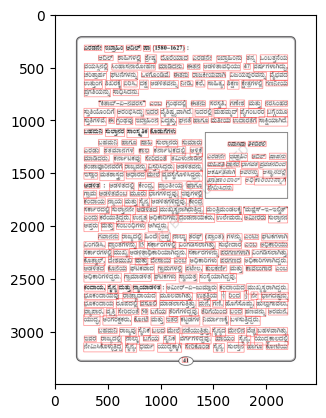

In [11]:
visualize_bboxes(img)

In [12]:
csv_img = pd.read_csv('../assignment-2-ksr-0011/Data/SMAI - AQ2/CSV/TLBR_101.csv')
X = csv_img.iloc[:, 1:3].values
X.shape

(261, 2)

#### Finding center points of each red box region

In [13]:

n = X.shape[0]
center_points =np.zeros((X.shape[0],2)) 
for i in range(n):
    top_left= [int(X[i][0].split(',')[0][1:]),int(X[i][0].split(',')[1][:-1])]
    bottom_right= [int(X[i][1].split(',')[0][1:]),int(X[i][1].split(',')[1][:-1])]
    center = [(top_left[0] + bottom_right[0]) // 2, (top_left[1] + bottom_right[1]) // 2]
    center_points[i] = np.array(center).astype('float')


#### New metrics of vertical and horizontal distances

In [14]:
from sklearn.metrics import pairwise_distances
def vertical_dist(p1, p2):
    return abs(p1[1] - p2[1])
def horizontal_dist(p1, p2):
    return abs(p1[0] - p2[0])

vertical_distan = pairwise_distances(center_points, center_points, vertical_dist)
horizontal_distan = pairwise_distances(center_points, center_points, horizontal_dist)

In [15]:
# Applying heirachical clustering and plotting dendogram
from scipy.cluster.hierarchy import dendrogram, linkage
H = linkage(horizontal_distan, 'single')
V = linkage(vertical_distan, 'single')

C:\Users\krish\AppData\Local\Temp\ipykernel_20028\1978311830.py:3: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  H = linkage(horizontal_distan, 'single')
C:\Users\krish\AppData\Local\Temp\ipykernel_20028\1978311830.py:4: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  V = linkage(vertical_distan, 'single')


Text(0, 0.5, 'Distance')

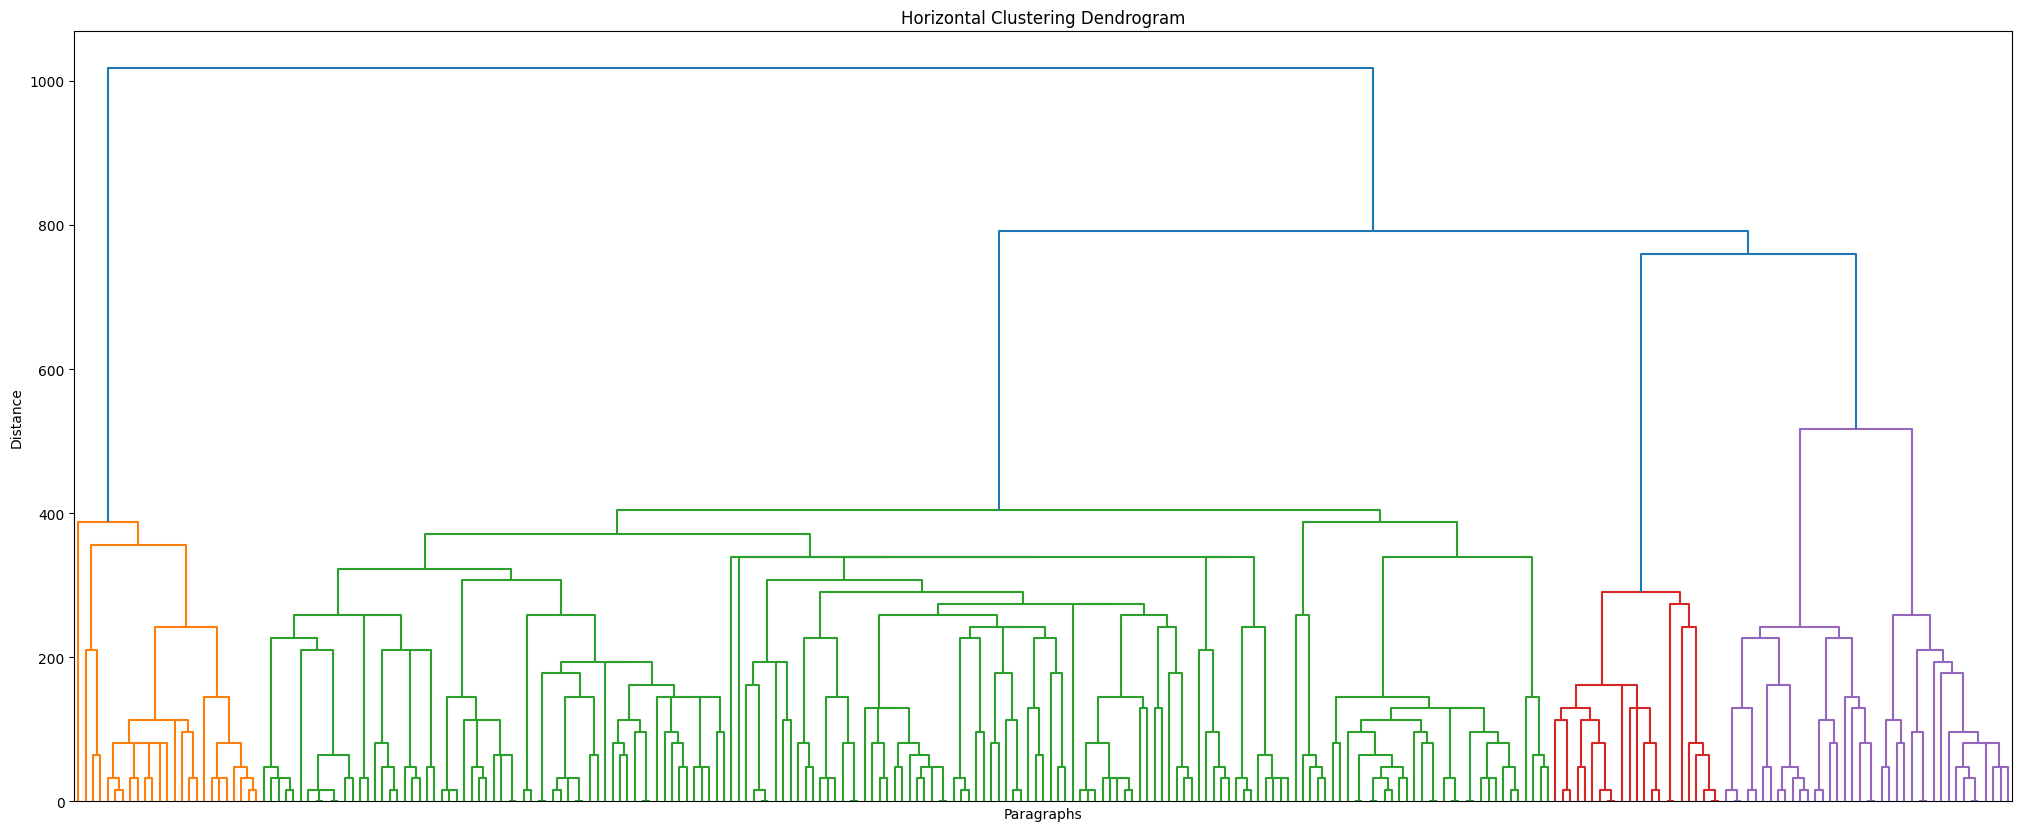

In [16]:
plt.figure(figsize=(25, 10))
plt.title('Horizontal Clustering Dendrogram')
dendrogram(
    H,
    leaf_rotation=90.,
    leaf_font_size=8.,
)
plt.xticks([])
plt.xlabel('Paragraphs')
plt.ylabel('Distance')

Text(0, 0.5, 'Distance')

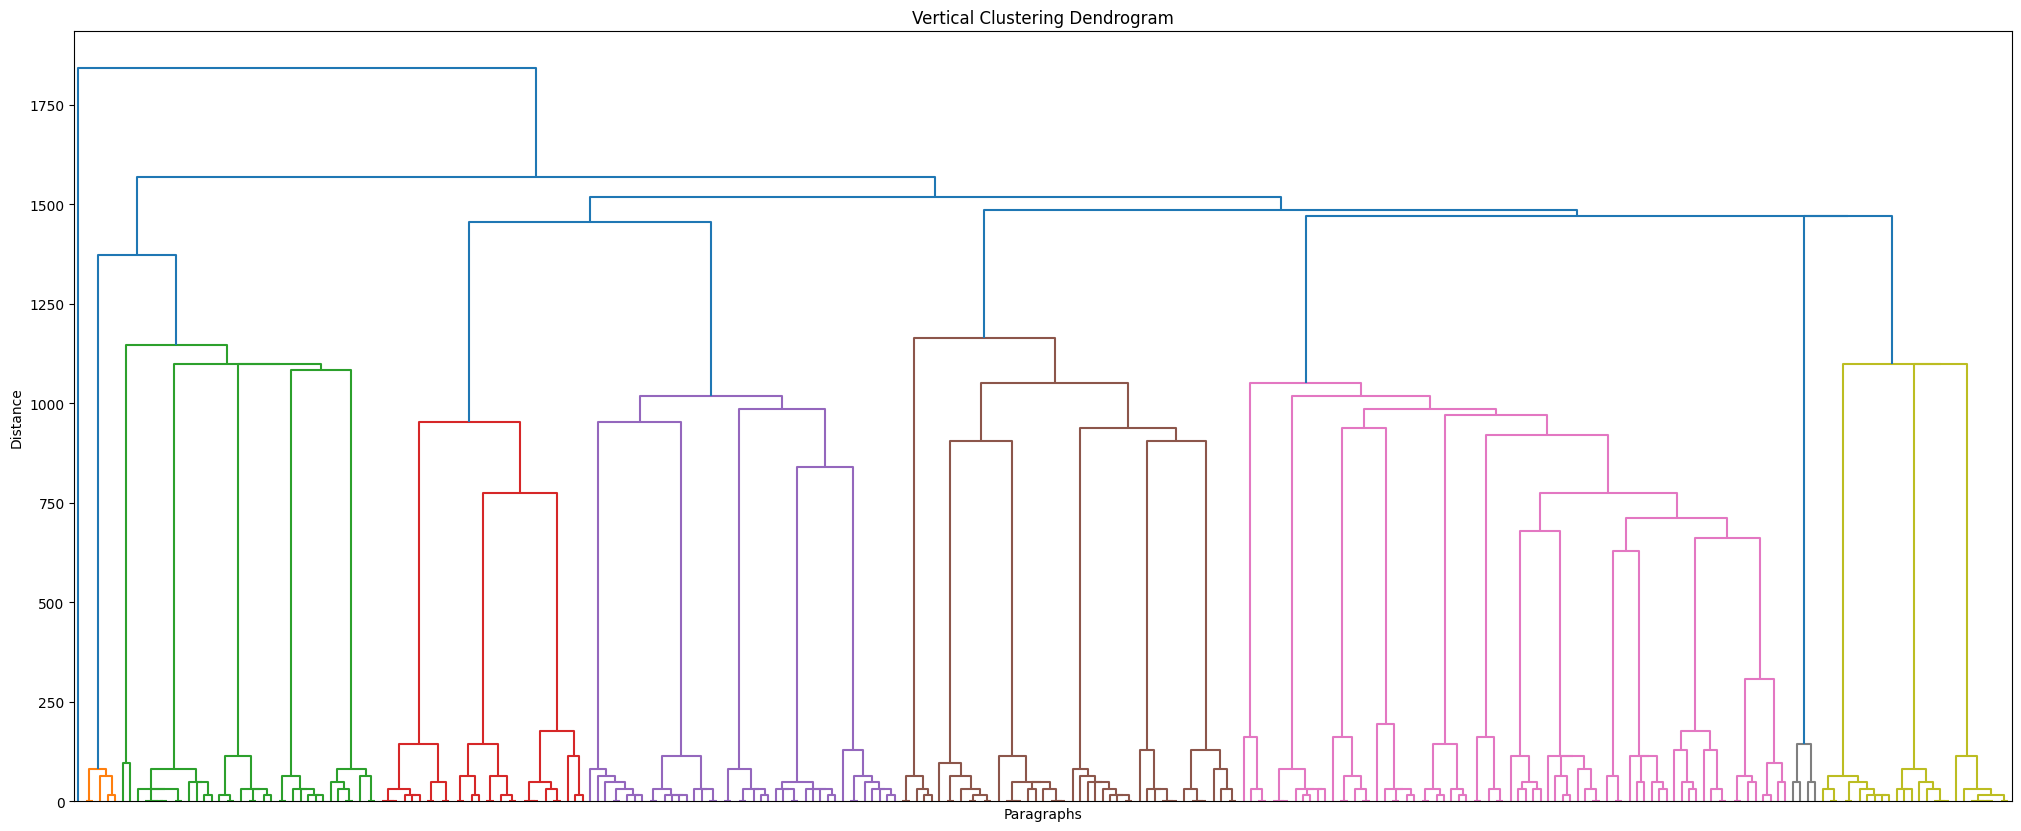

In [17]:
plt.figure(figsize=(25, 10))
plt.title('Vertical Clustering Dendrogram')
dendrogram(
    V,
    leaf_rotation=90.,
    leaf_font_size=8.,
)
plt.xticks([])
plt.xlabel('Paragraphs')
plt.ylabel('Distance')

#### From the dendograms we can see the vertical and horizontal distances of separation of the clusters formed.

In [19]:
horizontal_threshold = 400
vertical_threshold = 1600

#### Now, for rach red box, we find the nearest left, right, top , bottom red box. We also need to check of those distances are less than our threshold values. If Yes, then we connect them, else we donot.

In [20]:
data = []
X = csv_img.iloc[:, 1:4].values

for i in range(center_points.shape[0]):
    top_box = [np.inf , -1]
    bottom_box = [np.inf , -1]
    right_box = [np.inf , -1]
    left_box = [np.inf , -1]

    top_box_indices = np.where(center_points[: , 1] < center_points[i][1])[0]
    bottom_box_indices = np.where(center_points[: , 1] > center_points[i][1])[0]
    right_box_indices = np.where(center_points[: , 0] > center_points[i][0])[0]
    left_box_indices = np.where(center_points[: , 0] < center_points[i][0])[0]

    for j in top_box_indices:
        dis = vertical_dist(center_points[j] , center_points[i])
        if(dis < top_box[0]) and dis < vertical_threshold:
            top_box = [dis , j]
    
    for j in bottom_box_indices:
        dis = vertical_dist(center_points[j] , center_points[i])
        if(dis < bottom_box[0]) and dis < vertical_threshold:
            bottom_box = [dis , j]

    for j in right_box_indices:
        dis = horizontal_dist(center_points[j] , center_points[i])
        if(dis < right_box[0]) and dis < horizontal_threshold:
            right_box = [dis , j]

    for j in left_box_indices:
        dis = horizontal_dist(center_points[j] , center_points[i])
        if(dis < left_box[0]) and dis < horizontal_threshold:
            left_box = [dis , j]  

    if(top_box[1] == -1):
        top_box = [-1,0]

    if(right_box[1] == -1):
        right_box = [-1,0]

    if(left_box[1] == -1):
        left_box = [-1,0]

    if(bottom_box[1] == -1):
        bottom_box = [-1,0]

    top_left = [int(X[i][0].split(',')[0][1:]),int(X[i][0].split(',')[1][:-1])]
    bottom_right = [int(X[i][1].split(',')[0][1:]),int(X[i][1].split(',')[1][:-1])]

    top_edge = [center_points[i][0] , top_left[1]]
    bottom_edge = [center_points[i][0] , bottom_right[1]]
    left_edge = [top_left[0] , (top_left[1] + bottom_right[1])//2]
    right_edge = [bottom_right[0], (top_left[0] + bottom_right[0])//2]

    data.append([i , top_edge , bottom_edge , left_edge , right_edge , top_box , bottom_box , left_box , right_box])


In [21]:
columns = ['Id','Top','Bottom','Left','Right', 'Top_Box', 'Bottom_Box', 'Left_Box','Right_Box' ]

euclidean = pd.DataFrame(data , columns=columns)


In [335]:
required_image = make_connections(img)

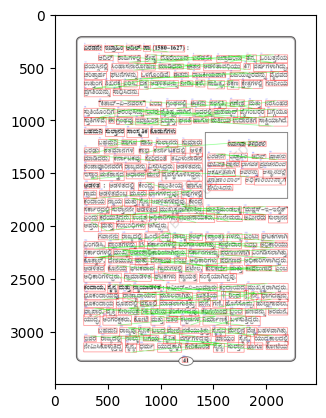

In [336]:
plt.imshow(required_image)

The Final Image has connected components within the paragraphs and not between the paragraphs.